<a href="https://colab.research.google.com/github/hansuho113/SwUniv_CancerAnalysis/blob/main/Colab_Notebook/Dohyeon/drug_gene_res_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

## PCA를 이용하여 차원 축소 시도

In [3]:
drug_gene_res = pd.read_csv("/content/drive/MyDrive/SW21/drug_gene_preprocessed.csv")
drug_gene_res

,index,bcr_patient_barcode,measure_of_response,regimen_indication,therapy_types,drug_name_,therapy_response,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,...,ZPBP2|124626,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN1|284312,ZSCAN12|9753,ZSCAN12P1|221584,ZSCAN16|80345,ZSCAN18|65982,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN2|54993,ZSCAN29|146050,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,TCGA-A6-6648-01A-11R-1774-07,TCGA-A6-6648,unknown,"OTHER, SPECIFY IN NOTES",unknown,oxaliplatin,unknown,0.0,14.170300,12.259200,324.308000,713.850000,0.0,152.732000,0.5083,0.0,0.0,0.0,3.049600,2.033000,0.0,0.0,0.0,0.0,0.0,0.0,732.147000,12.452400,0.0000,31.512100,0.0,0.0,2.0330,0.508300,506.480000,0.508300,6.792900,191.614000,6.861500,101.741000,...,0.0000,0.2541,737.992000,1298.830000,116.900000,160.864000,0.000000,0.254100,224.905000,33.545100,178.145000,461.245000,85.641700,142.473000,158.831000,4.32020,134.943000,722.745000,0.0000,134.435000,1.77890,518.678000,0.0,309.022000,240.661000,703.939000,488.437000,110.06600,233.799000,892.503000,940.45500,1146.630000,66.836100,558.577000,988.310000,1.016500,1029.220000,2791.870000,2283.100000,1205.5900
1,TCGA-A6-6648-01A-11R-1774-07,TCGA-A6-6648,unknown,"OTHER, SPECIFY IN NOTES",unknown,folinic,unknown,0.0,14.170300,12.259200,324.308000,713.850000,0.0,152.732000,0.5083,0.0,0.0,0.0,3.049600,2.033000,0.0,0.0,0.0,0.0,0.0,0.0,732.147000,12.452400,0.0000,31.512100,0.0,0.0,2.0330,0.508300,506.480000,0.508300,6.792900,191.614000,6.861500,101.741000,...,0.0000,0.2541,737.992000,1298.830000,116.900000,160.864000,0.000000,0.254100,224.905000,33.545100,178.145000,461.245000,85.641700,142.473000,158.831000,4.32020,134.943000,722.745000,0.0000,134.435000,1.77890,518.678000,0.0,309.022000,240.661000,703.939000,488.437000,110.06600,233.799000,892.503000,940.45500,1146.630000,66.836100,558.577000,988.310000,1.016500,1029.220000,2791.870000,2283.100000,1205.5900
2,TCGA-A6-6648-01A-11R-1774-07,TCGA-A6-6648,unknown,"OTHER, SPECIFY IN NOTES",unknown,fluorouracil,unknown,0.0,14.170300,12.259200,324.308000,713.850000,0.0,152.732000,0.5083,0.0,0.0,0.0,3.049600,2.033000,0.0,0.0,0.0,0.0,0.0,0.0,732.147000,12.452400,0.0000,31.512100,0.0,0.0,2.0330,0.508300,506.480000,0.508300,6.792900,191.614000,6.861500,101.741000,...,0.0000,0.2541,737.992000,1298.830000,116.900000,160.864000,0.000000,0.254100,224.905000,33.545100,178.145000,461.245000,85.641700,142.473000,158.831000,4.32020,134.943000,722.745000,0.0000,134.435000,1.77890,518.678000,0.0,309.022000,240.661000,703.939000,488.437000,110.06600,233.799000,892.503000,940.45500,1146.630000,66.836100,558.577000,988.310000,1.016500,1029.220000,2791.870000,2283.100000,1205.5900
3,TCGA-AZ-4615-01A-01R-1410-07,TCGA-AZ-4615,unknown,ADJUVANT,Chemotherapy,capecitabine,unknown,0.0,25.104200,23.888800,258.457000,1157.460000,0.0,59.828100,0.4711,0.0,0.0,0.0,0.000000,8.950700,0.0,0.0,0.0,0.0,0.0,0.0,975.150000,1.884300,0.0000,324.579000,0.0,0.0,0.4711,0.000000,801.319000,0.471100,24.162100,11.306100,0.000000,165.036000,...,0.4711,0.0000,518.196000,836.085000,30.620700,104.110000,0.000000,0.000000,60.299100,63.530800,97.043900,98.457200,45.695400,122.030000,84.795700,1.41330,141.326000,452.715000,3.7687,82.440200,1.88430,206.336000,0.0,71.605200,203.981000,190.790000,268.048000,114.66300,199.741000,762.690000,602.88300,1385.000000,57.001500,377.812000,835.237000,0.471100,598.280000,5186.670000,1034.510000,522.4360
4,TCGA-G4-6297-01A-11R-1723-07,TCGA-G

In [10]:
features = drug_gene_res.columns.tolist()
features

['index',
 'bcr_patient_barcode',
 'measure_of_response',
 'regimen_indication',
 'therapy_types',
 'drug_name_',
 'therapy_response',
 '?|100130426',
 '?|100133144',
 '?|100134869',
 '?|10357',
 '?|10431',
 '?|136542',
 '?|155060',
 '?|26823',
 '?|280660',
 '?|317712',
 '?|340602',
 '?|388795',
 '?|390284',
 '?|391343',
 '?|391714',
 '?|404770',
 '?|441362',
 '?|442388',
 '?|553137',
 '?|57714',
 '?|645851',
 '?|652919',
 '?|653553',
 '?|728045',
 '?|728603',
 '?|728788',
 '?|729884',
 '?|8225',
 '?|90288',
 'A1BG|1',
 'A1CF|29974',
 'A2BP1|54715',
 'A2LD1|87769',
 'A2M|2',
 'A2ML1|144568',
 'A4GALT|53947',
 'A4GNT|51146',
 'AAA1|404744',
 'AAAS|8086',
 'AACS|65985',
 'AACSL|729522',
 'AADAC|13',
 'AADACL2|344752',
 'AADACL3|126767',
 'AADACL4|343066',
 'AADAT|51166',
 'AAGAB|79719',
 'AAK1|22848',
 'AAMP|14',
 'AANAT|15',
 'AARS|16',
 'AARS2|57505',
 'AARSD1|80755',
 'AASDH|132949',
 'AASDHPPT|60496',
 'AASS|10157',
 'AATF|26574',
 'AATK|9625',
 'ABAT|18',
 'ABCA10|10349',
 'ABCA1|19

In [11]:
# 유전자 명칭만 따로 이름 리스트 생성
features_gene = features[7:]
features_gene

['?|100130426',
 '?|100133144',
 '?|100134869',
 '?|10357',
 '?|10431',
 '?|136542',
 '?|155060',
 '?|26823',
 '?|280660',
 '?|317712',
 '?|340602',
 '?|388795',
 '?|390284',
 '?|391343',
 '?|391714',
 '?|404770',
 '?|441362',
 '?|442388',
 '?|553137',
 '?|57714',
 '?|645851',
 '?|652919',
 '?|653553',
 '?|728045',
 '?|728603',
 '?|728788',
 '?|729884',
 '?|8225',
 '?|90288',
 'A1BG|1',
 'A1CF|29974',
 'A2BP1|54715',
 'A2LD1|87769',
 'A2M|2',
 'A2ML1|144568',
 'A4GALT|53947',
 'A4GNT|51146',
 'AAA1|404744',
 'AAAS|8086',
 'AACS|65985',
 'AACSL|729522',
 'AADAC|13',
 'AADACL2|344752',
 'AADACL3|126767',
 'AADACL4|343066',
 'AADAT|51166',
 'AAGAB|79719',
 'AAK1|22848',
 'AAMP|14',
 'AANAT|15',
 'AARS|16',
 'AARS2|57505',
 'AARSD1|80755',
 'AASDH|132949',
 'AASDHPPT|60496',
 'AASS|10157',
 'AATF|26574',
 'AATK|9625',
 'ABAT|18',
 'ABCA10|10349',
 'ABCA1|19',
 'ABCA11P|79963',
 'ABCA12|26154',
 'ABCA13|154664',
 'ABCA17P|650655',
 'ABCA2|20',
 'ABCA3|21',
 'ABCA4|24',
 'ABCA5|23461',
 'ABC

In [76]:
# 확인 위해 마지막 gene이름 확인
features_gene[-1]

'ZZZ3|26009'

In [50]:
# 차원 축소하기 위해서 표준화
from sklearn.preprocessing import StandardScaler
x = drug_gene_res.drop(['index','bcr_patient_barcode', 'measure_of_response','regimen_indication', 'therapy_types', 'drug_name_', 'therapy_response'], axis = 1).values
y = drug_gene_res['therapy_response'].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(x, columns = features_gene).head()


,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2M|2,A2ML1|144568,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACS|65985,...,ZPBP2|124626,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN1|284312,ZSCAN12|9753,ZSCAN12P1|221584,ZSCAN16|80345,ZSCAN18|65982,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN2|54993,ZSCAN29|146050,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,-0.190619,0.612719,0.182336,0.400231,-0.588096,0.0,-0.424833,0.184543,0.0,0.0,-0.386312,0.014375,-0.953063,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,0.807210,0.551537,-0.568961,-0.753731,0.0,-0.11134,2.787643,-0.288566,-0.573604,-0.486848,-0.974413,0.032643,-0.303836,-1.005056,-0.424093,-0.379231,-1.090833,-0.167218,-0.349443,-0.481766,-0.152331,...,-0.522328,-0.117867,0.589004,0.204334,2.069151,-0.547001,-0.197396,-0.248548,1.686383,-0.195357,0.295007,0.326969,1.688003,-0.550475,0.992579,-0.268786,-0.554628,1.623502,-0.412562,2.635629,-0.048689,0.078181,-0.128731,0.715399,-0.951400,1.772808,0.360900,-0.920263,0.757383,2.553023,2.250665,0.560567,0.437500,0.528619,-0.198317,0.082900,2.051187,-1.288201,0.508515,3.743657
1,-0.190619,0.612719,0.182336,0.400231,-0.588096,0.0,-0.424833,0.184543,0.0,0.0,-0.386312,0.014375,-0.953063,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,0.807210,0.551537,-0.568961,-0.753731,0.0,-0.11134,2.787643,-0.288566,-0.573604,-0.486848,-0.974413,0.032643,-0.303836,-1.005056,-0.424093,-0.379231,-1.090833,-0.167218,-0.349443,-0.481766,-0.152331,...,-0.522328,-0.117867,0.589004,0.204334,2.069151,-0.547001,-0.197396,-0.248548,1.686383,-0.195357,0.295007,0.326969,1.688003,-0.550475,0.992579,-0.268786,-0.554628,1.623502,-0.412562,2.635629,-0.048689,0.078181,-0.128731,0.715399,-0.951400,1.772808,0.360900,-0.920263,0.757383,2.553023,2.250665,0.560567,0.437500,0.528619,-0.198317,0.082900,2.051187,-1.288201,0.508515,3.743657
2,-0.190619,0.612719,0.182336,0.400231,-0.588096,0.0,-0.424833,0.184543,0.0,0.0,-0.386312,0.014375,-0.953063,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,0.807210,0.551537,-0.568961,-0.753731,0.0,-0.11134,2.787643,-0.288566,-0.573604,-0.486848,-0.974413,0.032643,-0.303836,-1.005056,-0.424093,-0.379231,-1.090833,-0.167218,-0.349443,-0.481766,-0.152331,...,-0.522328,-0.117867,0.589004,0.204334,2.069151,-0.547001,-0.197396,-0.248548,1.686383,-0.195357,0.295007,0.326969,1.688003,-0.550475,0.992579,-0.268786,-0.554628,1.623502,-0.412562,2.635629,-0.048689,0.078181,-0.128731,0.715399,-0.951400,1.772808,0.360900,-0.920263,0.757383,2.553023,2.250665,0.560567,0.437500,0.528619,-0.198317,0.082900,2.051187,-1.288201,0.508515,3.743657
3,-0.190619,2.355440,1.679913,-0.039112,1.072116,0.0,-1.029376,0.120756,0.0,0.0,-0.386312,-0.427309,1.958145,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,1.538813,-1.096021,-0.568961,0.039041,0.0,-0.11134,0.400810,-0.385321,-0.275360,-0.492827,-0.312413,-1.588260,-0.541620,-0.143505,-0.590694,-0.393648,-0.195609,0.147207,1.725081,-0.159360,-0.474851,...,0.348639,-0.500806,-0.683911,-0.870331,-0.771563,-1.145629,-0.197396,-0.300715,-1.227692,0.997164,-0.789925,-0.836401,-0.373126,-0.890156,-0.378757,-0.555232,-0.449403,-0.140798,2.018568,0.686345,-0.017373,-1.227721,-0.128731,-1.328362,-1.141674,-0.777104,-1.057405,-0.837330,0.208813,1.682164,0.596063,1.186225,0.022706,-0.647188,-0.802103,-0.241006,-0.091526,0.008861,-0.597441,-0.462317
4,-0.190619,0.234558,-0.137600,1.009371,-0.941700,0.0,0.066172,0.134988,0.0,0.0,-0.386312,-0.288443,-0.598173,-0.279173,-0.352749,0.0,

In [51]:
# PCA 일단 2차원으로 해봄 /  그래프 그려보려고
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component1', 'principal component2'])

In [52]:
principalDf

,principal component1,principal component2
0,-21.005922,-37.657494
1,-21.005922,-37.657494
2,-21.005922,-37.657494
3,-10.171046,-0.296607
4,-18.133158,1.481876
...,...,...
240,-79.523150,-34.028486
241,-79.523150,-34.028486
242,-79.523150,-34.028486
243,-79.523150,-34.028486


In [53]:
principalDf.head()

,principal component1,principal component2
0,-21.005922,-37.657494
1,-21.005922,-37.657494
2,-21.005922,-37.657494
3,-10.171046,-0.296607
4,-18.133158,1.481876


In [54]:
pca.explained_variance_ratio_

array([0.11774185, 0.09250884])

In [55]:
sum(pca.explained_variance_ratio_)

0.21025069215726577

In [56]:
finalDf = principalDf
finalDf['target'] = drug_gene_res['therapy_response']
finalDf

,principal component1,principal component2,target
0,-21.005922,-37.657494,unknown
1,-21.005922,-37.657494,unknown
2,-21.005922,-37.657494,unknown
3,-10.171046,-0.296607,unknown
4,-18.133158,1.481876,unknown
...,...,...,...
240,-79.523150,-34.028486,unknown
241,-79.523150,-34.028486,unknown
242,-79.523150,-34.028486,unknown
243,-79.523150,-34.028486,unknown


In [57]:
# 값들 맞나 확인
finalDf.target.value_counts()

unknown        158
response        56
no response     31
Name: target, dtype: int64

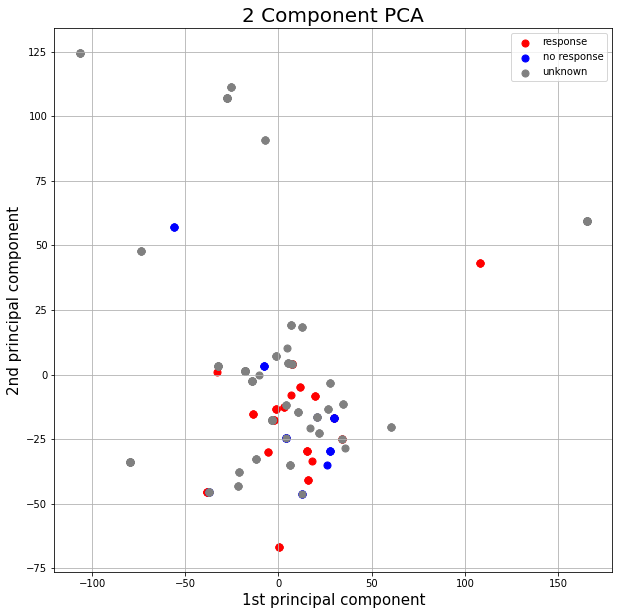

In [59]:
# PCA 2차원 그래프 그리기
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('1st principal component', fontsize = 15)
ax.set_ylabel('2nd principal component', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['response','no response','unknown']
colors = ['r','b','grey']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component1'], finalDf.loc[indicesToKeep, 'principal component2'], c = color, s = 50)
  ax.legend(targets)
  ax.grid()

흠,,,,,??

In [66]:
# 3차원 그래프 그려보려고 해봄
pca2 = PCA(n_components = 3)
principalComponents2 = pca2.fit_transform(x)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component1','principal component2','principal component3'])

pca2.explained_variance_ratio_

array([0.11774185, 0.09250884, 0.08807395])

In [67]:
finalDf2 = principalDf2
finalDf2['target'] = drug_gene_res['therapy_response']
finalDf2

,principal component1,principal component2,principal component3,target
0,-21.005789,-37.656732,-33.837292,unknown
1,-21.005789,-37.656732,-33.837292,unknown
2,-21.005789,-37.656732,-33.837292,unknown
3,-10.171013,-0.296297,-6.536394,unknown
4,-18.133165,1.481899,-18.146942,unknown
...,...,...,...,...
240,-79.523168,-34.028902,-2.562998,unknown
241,-79.523168,-34.028902,-2.562998,unknown
242,-79.523168,-34.028902,-2.562998,unknown
243,-79.523168,-34.028902,-2.562998,unknown


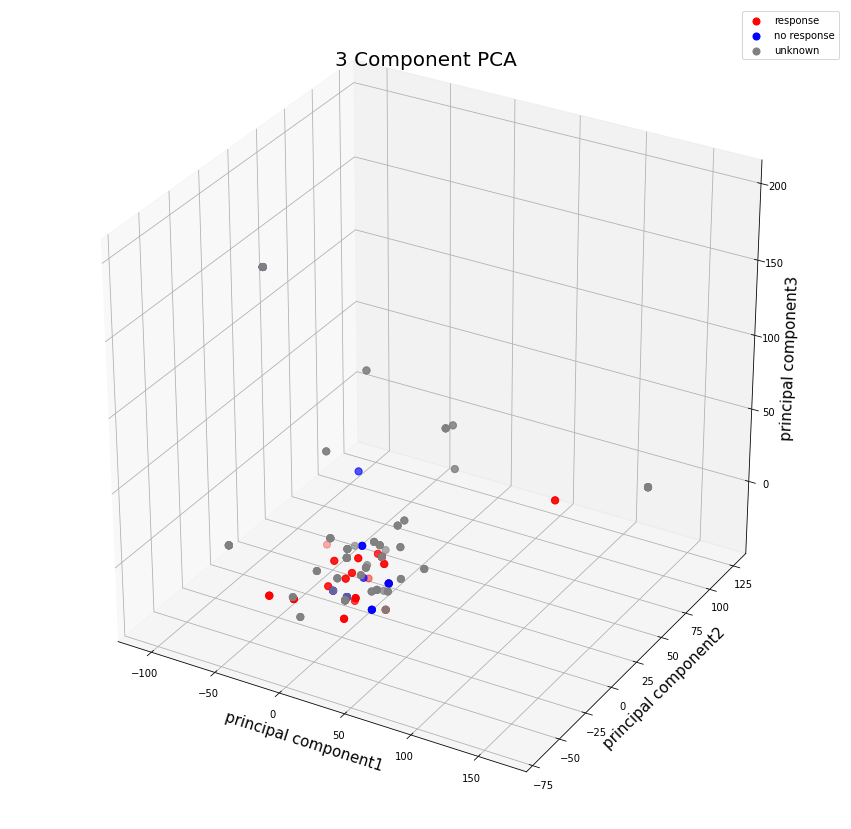

In [75]:
# pca 3차원 그래프
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize = (15,15))
ax2 = fig2.add_subplot(111, projection = '3d')

ax2.set_xlabel('principal component1', fontsize = 15)
ax2.set_ylabel('principal component2', fontsize = 15)
ax2.set_zlabel('principal component3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

colors = ['r','b','grey']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf2['target'] == target
  ax2.scatter(finalDf2.loc[indicesToKeep, 'principal component1'],
             finalDf2.loc[indicesToKeep, 'principal component2'],
             finalDf2.loc[indicesToKeep, 'principal component3'],
             c = color,
             s = 50)
  ax2.legend(targets)
  ax2.grid()

## PCA 차원축소 한 30차원으로

In [77]:
column_30d = ['principal component1','principal component2','principal component3','principal component4','principal component5',
              'principal component6','principal component7','principal component8','principal component9','principal component10',
              'principal component11','principal component12','principal component13','principal component14','principal component15',
              'principal component16','principal component17','principal component18','principal component19','principal component20',
              'principal component21','principal component22','principal component23','principal component24','principal component25',
              'principal component26','principal component27','principal component28','principal component29','principal component30']

In [82]:
pca_30d = PCA(n_components = 30)
principalComponents_30d = pca_30d.fit_transform(x)
principalDf_30d = pd.DataFrame(data = principalComponents_30d, columns = column_30d)

In [83]:
principalDf_30d.head()

,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6,principal component7,principal component8,principal component9,principal component10,principal component11,principal component12,principal component13,principal component14,principal component15,principal component16,principal component17,principal component18,principal component19,principal component20,principal component21,principal component22,principal component23,principal component24,principal component25,principal component26,principal component27,principal component28,principal component29,principal component30
0,-21.005800,-37.656800,-33.837386,4.666245,-47.084744,-17.417449,-5.018580,-38.139757,-19.008119,35.343829,-3.751022,-15.985925,24.235268,-4.982350,-8.173042,-3.659463,7.412511,22.924910,-20.323084,5.587770,-12.626116,48.930233,18.164619,-2.710318,18.285665,2.497121,-3.607131,-6.606486,-12.023356,17.906120
1,-21.005800,-37.656800,-33.837386,4.666245,-47.084744,-17.417449,-5.018580,-38.139757,-19.008119,35.343829,-3.751022,-15.985925,24.235268,-4.982350,-8.173042,-3.659463,7.412511,22.924910,-20.323084,5.587770,-12.626116,48.930233,18.164619,-2.710318,18.285665,2.497121,-3.607131,-6.606486,-12.023356,17.906120
2,-21.005800,-37.656800,-33.837386,4.666245,-47.084744,-17.417449,-5.018580,-38.139757,-19.008119,35.343829,-3.751022,-15.985925,24.235268,-4.982350,-8.173042,-3.659463,7.412511,22.924910,-20.323084,5.587770,-12.626116,48.930233,18.164619,-2.710318,18.285665,2.497121,-3.607131,-6.606486,-12.023356,17.906120
3,-10.170985,-0.296301,-6.536232,35.148015,32.627940,-18.301488,-7.434278,2.539765,27.223232,22.905683,-36.390414,9.551863,22.610279,-17.727006,3.844527,1.859353,-8.435359,-22.275096,1.229687,13.510788,-5.811590,-11.990054,4.527085,5.760239,-20.764596,5.238041,-0.412154,1.283089,1.653402,-4.352052
4,-18.133135,1.481906,-18.146582,-53.646525,20.192374,-18.265323,-39.809612,31.080324,18.514003,28.262537,27.131262,1.838415,8.653670,13.187154,14.565547,-5.993284,14.734126,-8.182523,-20.722043,10.373721,7.215646,-6.317219,-0.904946,0.523754,1.830128,-1.063909,8.576830,1.029720,-3.497580,-5.894169


In [84]:
pca_30d.explained_variance_ratio_

array([0.11774185, 0.09250884, 0.08807395, 0.06513012, 0.05432784,
       0.04617087, 0.03707724, 0.03180292, 0.02938419, 0.02599039,
       0.02509998, 0.0228179 , 0.0206607 , 0.02013281, 0.0172937 ,
       0.0164036 , 0.01601467, 0.01468105, 0.01414983, 0.01343619,
       0.01328476, 0.01269473, 0.01169197, 0.01136259, 0.01076276,
       0.0101541 , 0.00994205, 0.00956579, 0.00935767, 0.00902991])

In [85]:
# 누적 설명 분산량 = 87% - not bad
sum(pca_30d.explained_variance_ratio_)

0.8767449549591645

t-SNE
어떤 논문에서 t-SNE를 이용해서 차원축소했다고,, 내일 한번 도전해보기